In [ ]:
import numpy as np

import cv2
import glob

from sklearn.model_selection import train_test_split
import sklearn
from sklearn import metrics

from keras import models
from keras import layers
from keras import Input
from keras.optimizers import Adam

import matplotlib.pyplot as plt

#
_Output_path = "C:/Users/Documents/Python_project/Laserwelding/Recoding/Data/Output.csv"
Output_data = np.loadtxt(_Output_path, delimiter=',', dtype=np.str, encoding='utf-8')
Output_data = np.array(Output_data, dtype=np.float32)
print(Output_data.shape)

#
_img_path = 'C:/Users/Documents/Python_project/Laserwelding/Data/mergeImage/*.jpg'
_imgs_path = sorted(glob.glob(_img_path))

imgs = []
for i in _imgs_path:
    
    imgs.append(cv2.imread(i, cv2.IMREAD_GRAYSCALE))

imgs = np.array(imgs)
Input_data = imgs
print(Input_data.shape)

#
_Input_path2 = "C:/Users/Documents/Python_project/Laserwelding/Recoding/Data/Input_data2.csv"
Input_data2 = np.loadtxt(_Input_path2, delimiter=',', dtype=np.str, encoding='utf-8')
Input_data2 = np.array(Input_data2, dtype=np.float32)
print(Input_data2.shape)

In [ ]:
#
#CNN을 위한 입력 데이터 리사이징---------------------------------------------------
Input_data = Input_data.reshape((2115,232,768,1))
Input_data2 = Input_data2.reshape((2115,100,1))
print(Input_data.shape)
print(Input_data2.shape)
#출력 데이터 확인--------------------------------------------------------------
print(Output_data.shape)


#
#입력 데이터 70:15:15로 나누기(Training, validation, test)------------------

#image

# split data: Training data를 70%
x_train, x_test, y_train, y_test = train_test_split(Input_data, Output_data, 
				       train_size=0.70, random_state=42)
# split data: Validation과 Test data를 50:50 으로
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, 
				       train_size=0.50, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train)

#photodiode

# split data: Training data를 70%
x2_train, x2_test, y2_train, y2_test = train_test_split(Input_data2, Output_data, 
				       train_size=0.70, random_state=42)
# split data: Validation과 Test data를 50:50 으로
x2_val, x2_test, y2_val, y2_test = train_test_split(x2_test, y2_test, 
				       train_size=0.50, random_state=42)

print(x2_train.shape)
print(y_train.shape)
print(x2_val.shape)
print(y_val.shape)
print(x2_test.shape)
print(y_test.shape)

print(y_train)
print(y2_train)

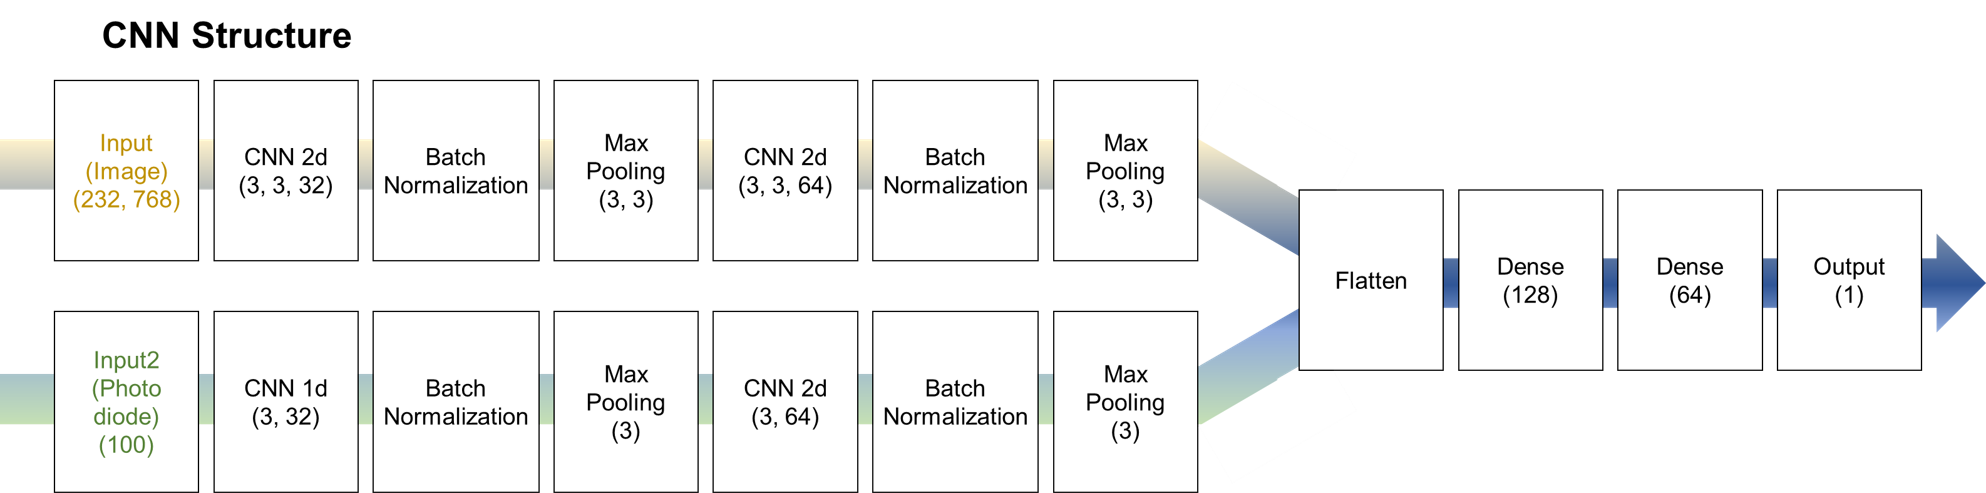

In [ ]:
X1 = Input(shape=(232, 768, 1), dtype='float32')
X2 = Input(shape=(100, 1), dtype='float32')

Model_1_1 = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(232, 768, 1))(X1)
Model_1_2 = layers.BatchNormalization()(Model_1_1)
Model_1_3 = layers.MaxPooling2D((3, 3))(Model_1_2)
Model_1_4 = layers.Conv2D(64, (3, 3), activation='relu')(Model_1_3)
Model_1_5 = layers.BatchNormalization()(Model_1_4)
Model_1_6 = layers.MaxPooling2D((3, 3))(Model_1_5)
Model_1_7 = layers.Flatten()(Model_1_6)

Model_2_1 = layers.Conv1D(32, (3), activation='relu', input_shape=(100, 1))(X2)
Model_2_2 = layers.BatchNormalization()(Model_2_1)
Model_2_3 = layers.MaxPooling1D((3))(Model_2_2)
Model_2_4 = layers.Conv1D(64, (3), activation='relu')(Model_2_3)
Model_2_5 = layers.BatchNormalization()(Model_2_4)
Model_2_6 = layers.MaxPooling1D((3))(Model_2_5)
Model_2_7 = layers.Flatten()(Model_2_6)

concatenated = layers.concatenate([Model_1_7, Model_2_7], axis=-1)
Model_3_1 = layers.Dense(128, activation='relu')(concatenated)
Model_3_2 = layers.Dense(64, activation='relu')(Model_3_1)
answer = layers.Dense(1, activation='relu')(Model_3_2)

model = models.Model([X1, X2], answer)

model.summary()

In [ ]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'mape'])
#학습 시작-------------------------------
history = model.fit([x_train, x2_train], y_train, epochs=100, batch_size=10, validation_data=([x_val, x2_val], y_val))

In [ ]:
trainresult = model.predict((x_train, x2_train))
valresult = model.predict((x_val, x2_val))
testresult = model.predict((x_test, x2_test))

print(trainresult.shape)
print(valresult.shape)
print(testresult.shape)

In [ ]:
from keras.models import load_model

model.save('C:/Users/Documents/Python_project/Laserwelding/Recoding/Data/Multi_batchN.h5')  # creates a HDF5 file 'my_model.h5'